
# <span style="color:rgb(213,80,0)">Exercise 8.5</span>

Analysis of body measurements to predict percentage of body fat in males. This file creates Figures A.53-A.56.

## Data loading

In [1]:
load fat
fatsel=fat{:,["neck" "chest" "abdomen" "hip" "thigh" "knee" "ankle" "bicep" "forearm" "wrist"]};
X=pivotCoord(fatsel);

body_fat=fat.body_fat;
y=log(body_fat./(100-body_fat));

conflev=[0.95 0.99];
prin=0;

## Create Figure A.53

S estimators with 2 values of bdp


In [2]:
figure;
h1=subplot(2,1,1);
bdp=0.25;
[out]=Sreg(y,X,'nsamp',3000,'bdp',bdp);

Total estimated time to complete S estimate:  3.33 seconds

In [3]:
resindexplot(out,'h',h1,'conflev',conflev);
ylabel(['Breakdown point =' num2str(bdp)])

h2=subplot(2,1,2);
bdp=0.5;
[out]=Sreg(y,X,'nsamp',3000,'bdp',bdp);

Total estimated time to complete S estimate:  3.89 seconds


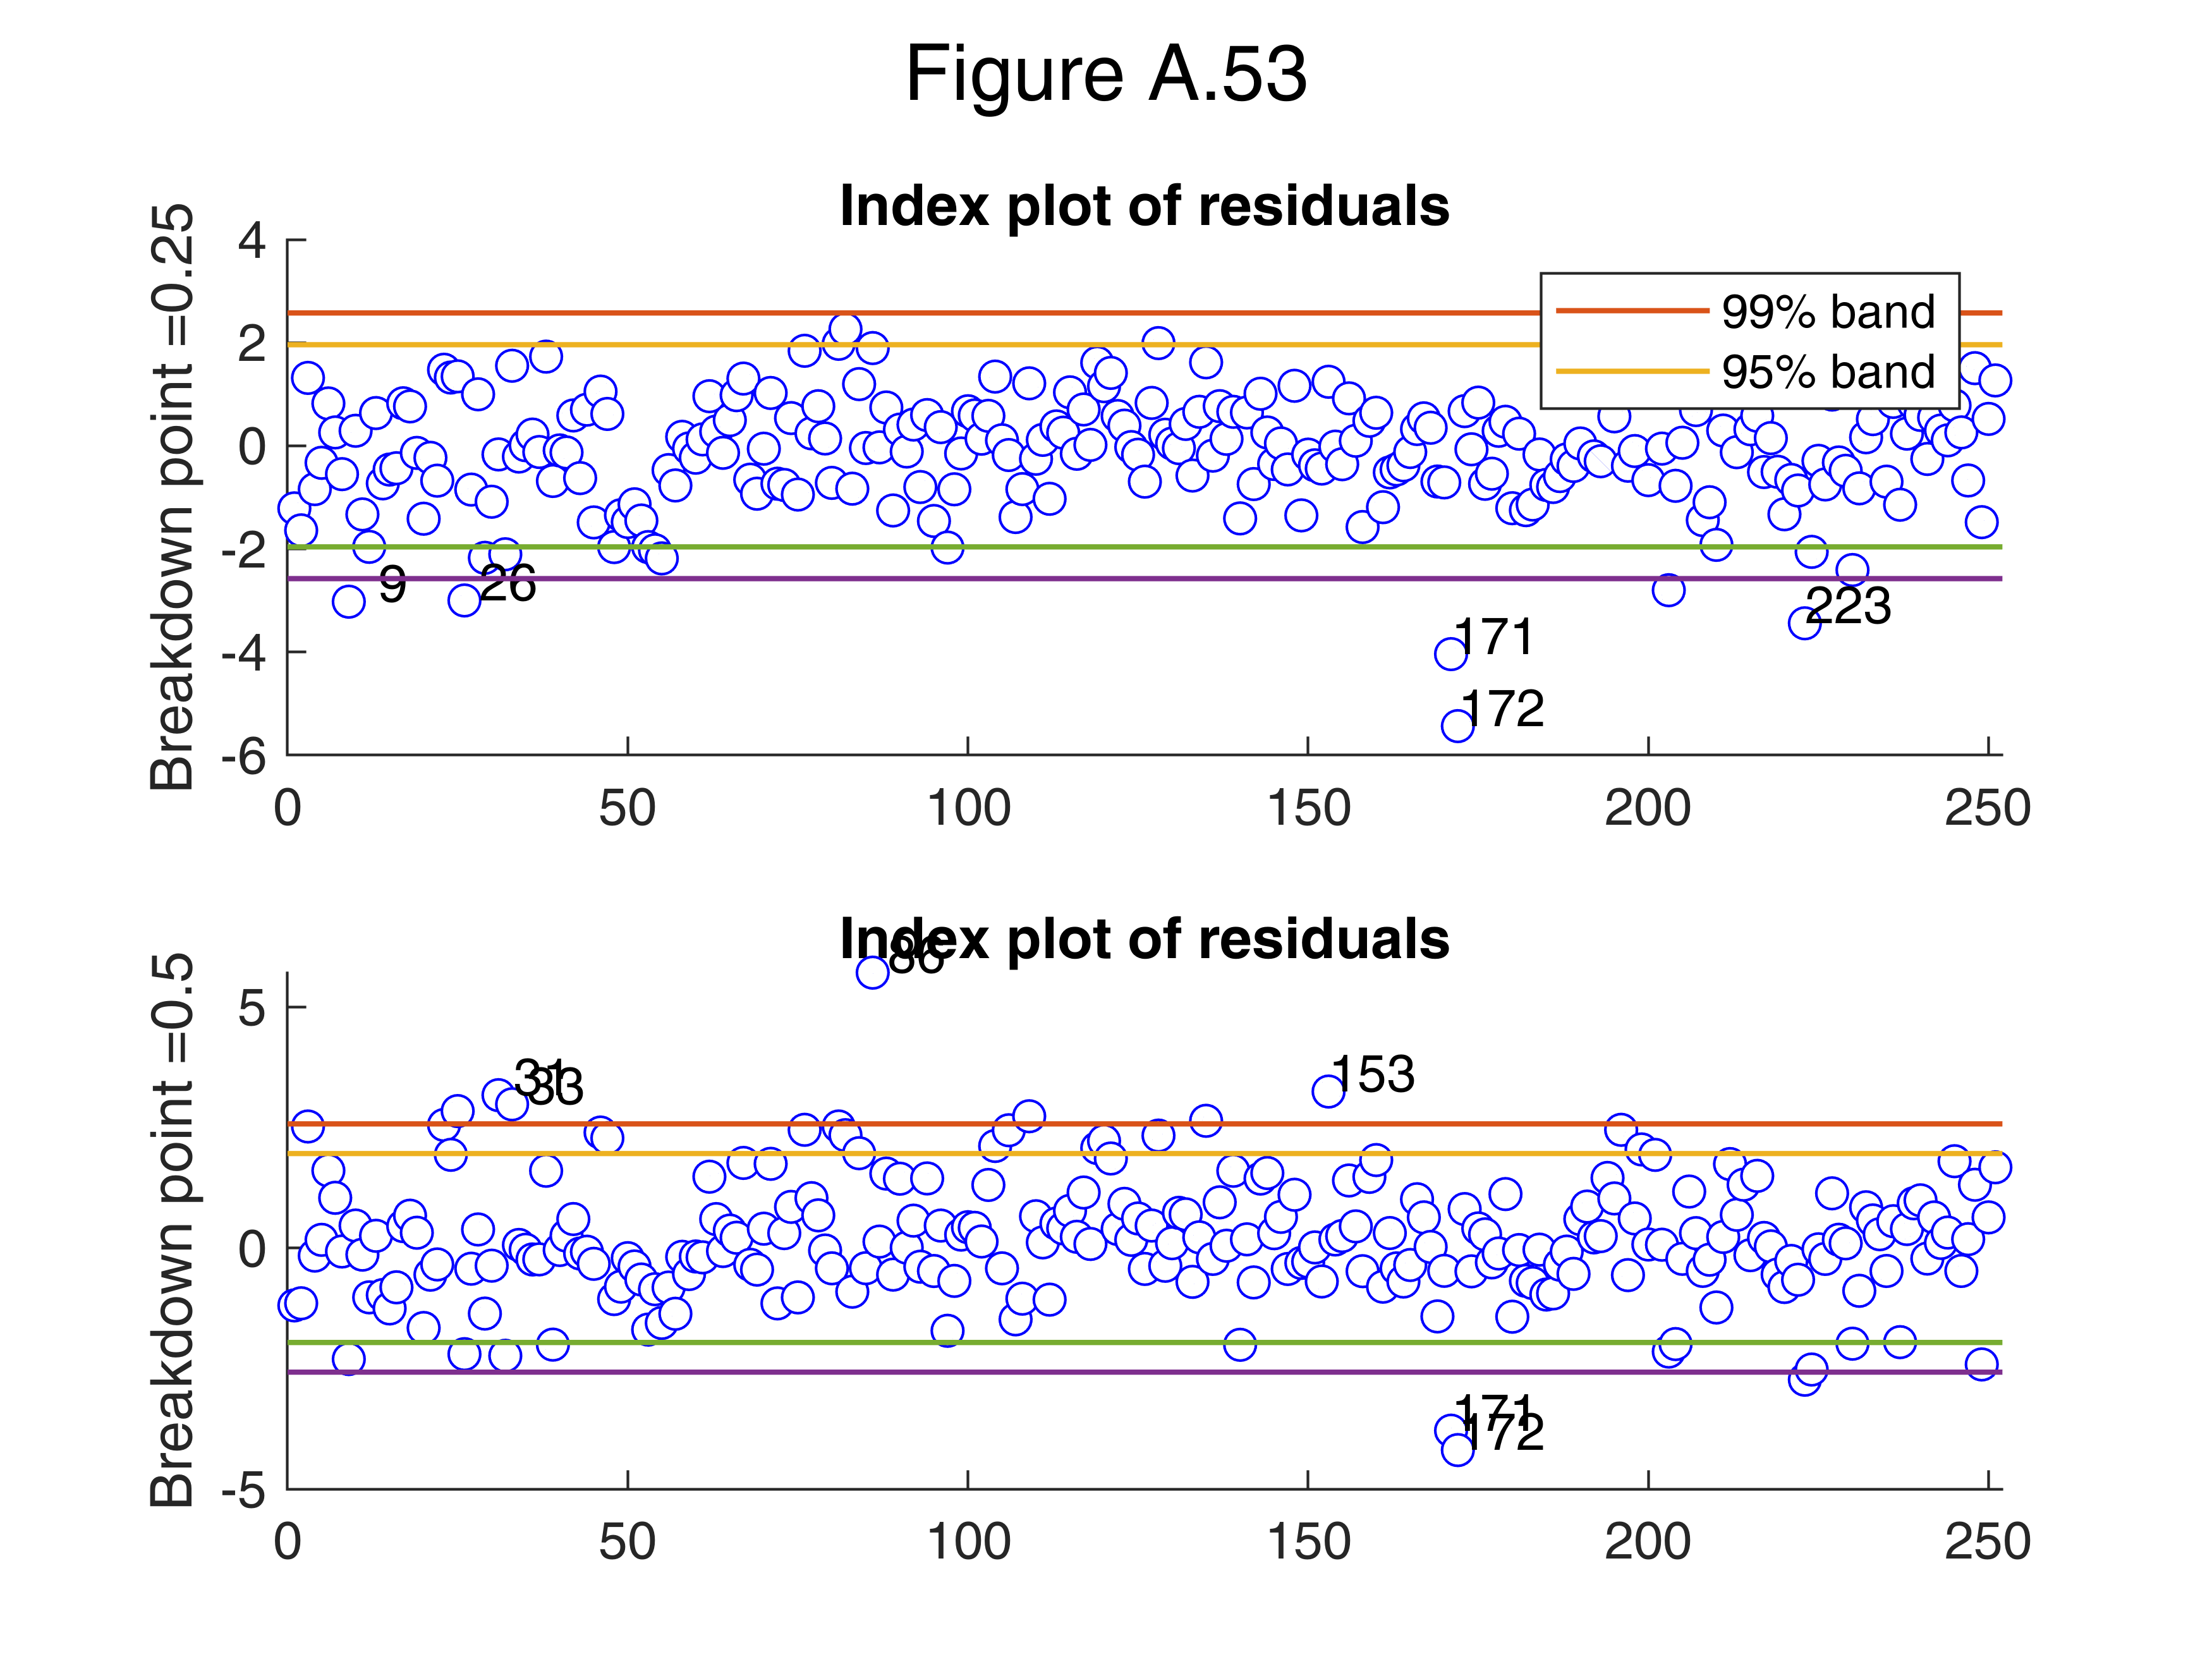

In [4]:
resindexplot(out,'h',h2,'conflev',conflev,'numlab',{6});
ylabel(['Breakdown point =' num2str(bdp)])
cascade;
if prin==1
    % print to postscript
    print -depsc fatilr_S.eps;
end

sgtitle('Figure A.53')
set(gcf,"Name",'Figure A.53')

## Create Figure A.54

MM estimators with 2 values of efficiency MMreg using two different level of efficiency


In [5]:
conflev=[0.95 0.99];
figure;
h1=subplot(2,1,1);
eff=0.80;
[out]=MMreg(y,X,'Snsamp',3000,'eff',eff);

Total estimated time to complete S estimate:  4.07 seconds

In [6]:
resindexplot(out,'h',h1,'conflev',conflev,'numlab',{6});
ylabel(['Eff.=' num2str(eff)])
h2=subplot(2,1,2);
eff=0.99;
[out]=MMreg(y,X,'Snsamp',3000,'eff',eff);

Total estimated time to complete S estimate:  3.64 seconds


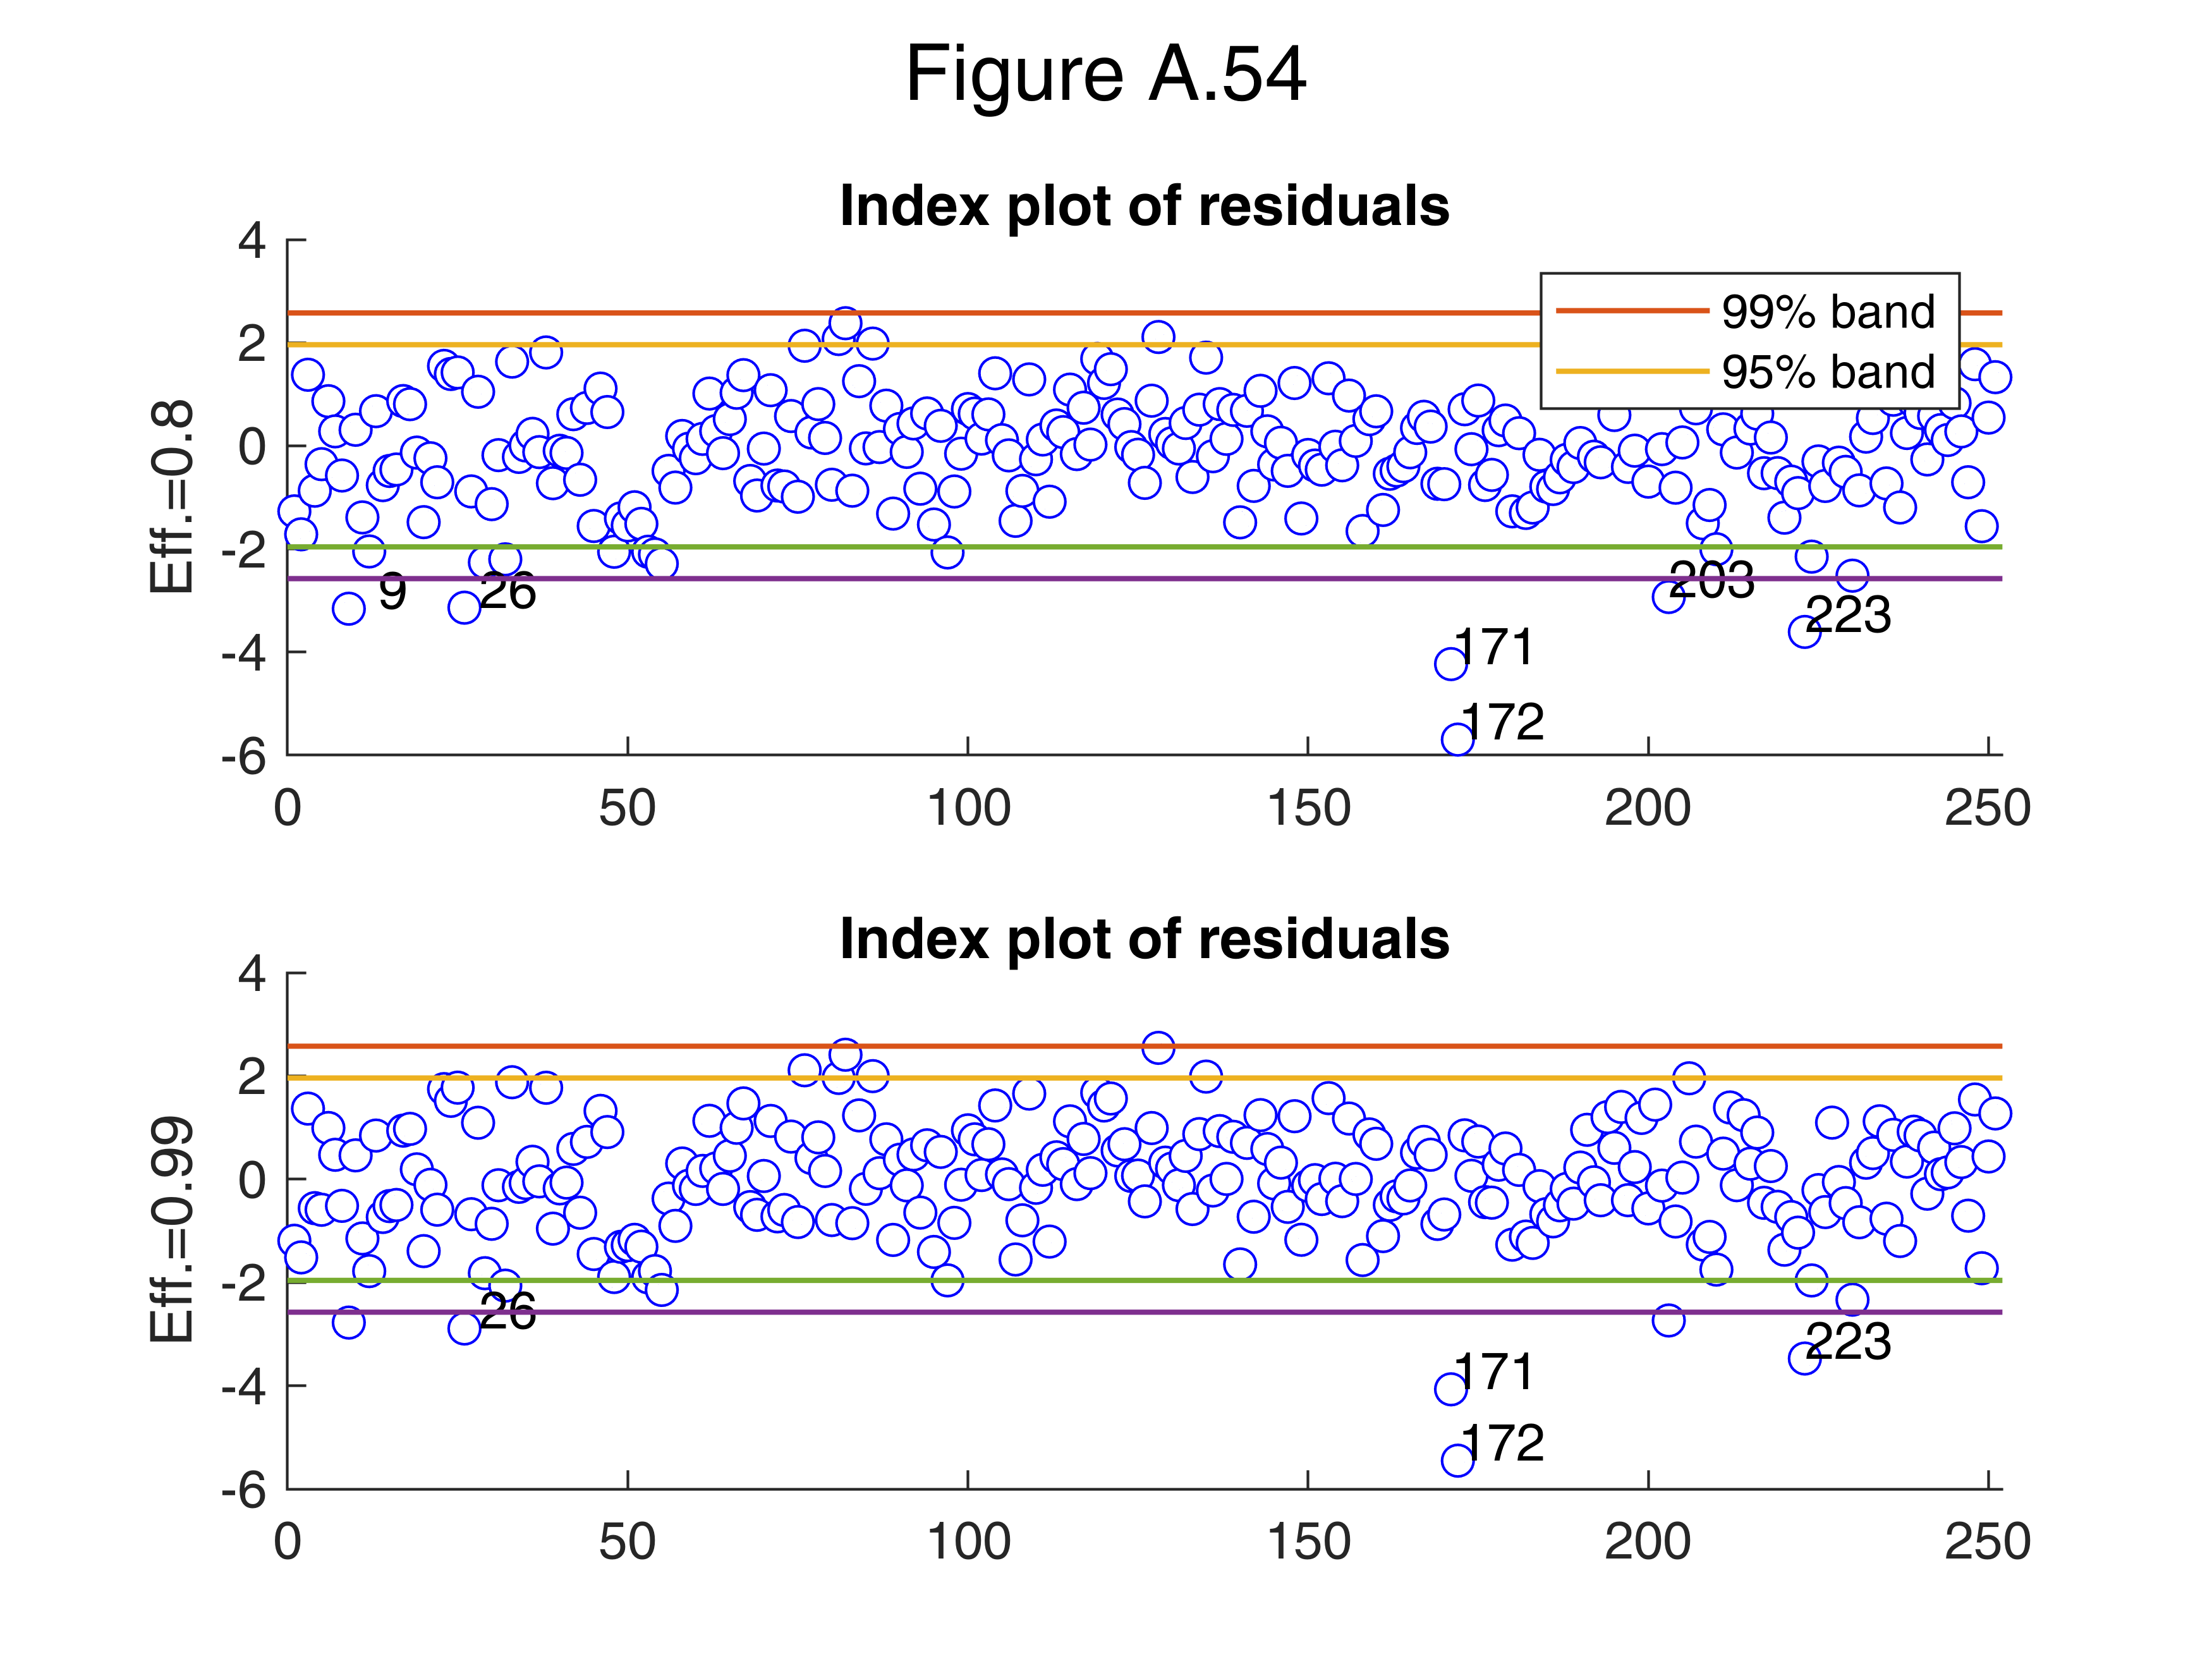

In [7]:
resindexplot(out,'h',h2,'conflev',conflev,'numlab',{4});
ylabel(['Eff.=' num2str(eff)])
if prin==1
    % print to postscript
    print -depsc fatilr_MM.eps;
end

sgtitle('Figure A.54')
set(gcf,"Name",'Figure A.54')

In [8]:
drawnow

## Create Figures A.55 and A.56

Forward search Signal is in step m=250


In [9]:
[out]=LXS(y,X,'nsamp',1000);

Total estimated time to complete LMS:  0.07 seconds

In [10]:
fsout=FSR(y, X,'plots',0);

-------------------------
Signal detection loop
Signal is in final step of the search
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=249
Superimposition stopped because r_{min}(249,251)>99% envelope
 !!!EQ_1!!! \% envelope
Subsample of 250 units is homogeneous
----------------------------
Final output
Number of units declared as outliers=1
Summary of the exceedances
           1          99         999        9999       99999
           5           3           1           0           0

In [11]:
disp(fsout)

         ListOut: 172
        outliers: 172
             mdr: [220x2 double]
              Un: [220x11 double]
            nout: [2x5 double]
            beta: [10x1 double]
           scale: 0.3141
    fittedvalues: [251x1 double]
       residuals: [251x1 double]
           class: 'FSR'

## Create Figure A.55

Monitoring S estimtes



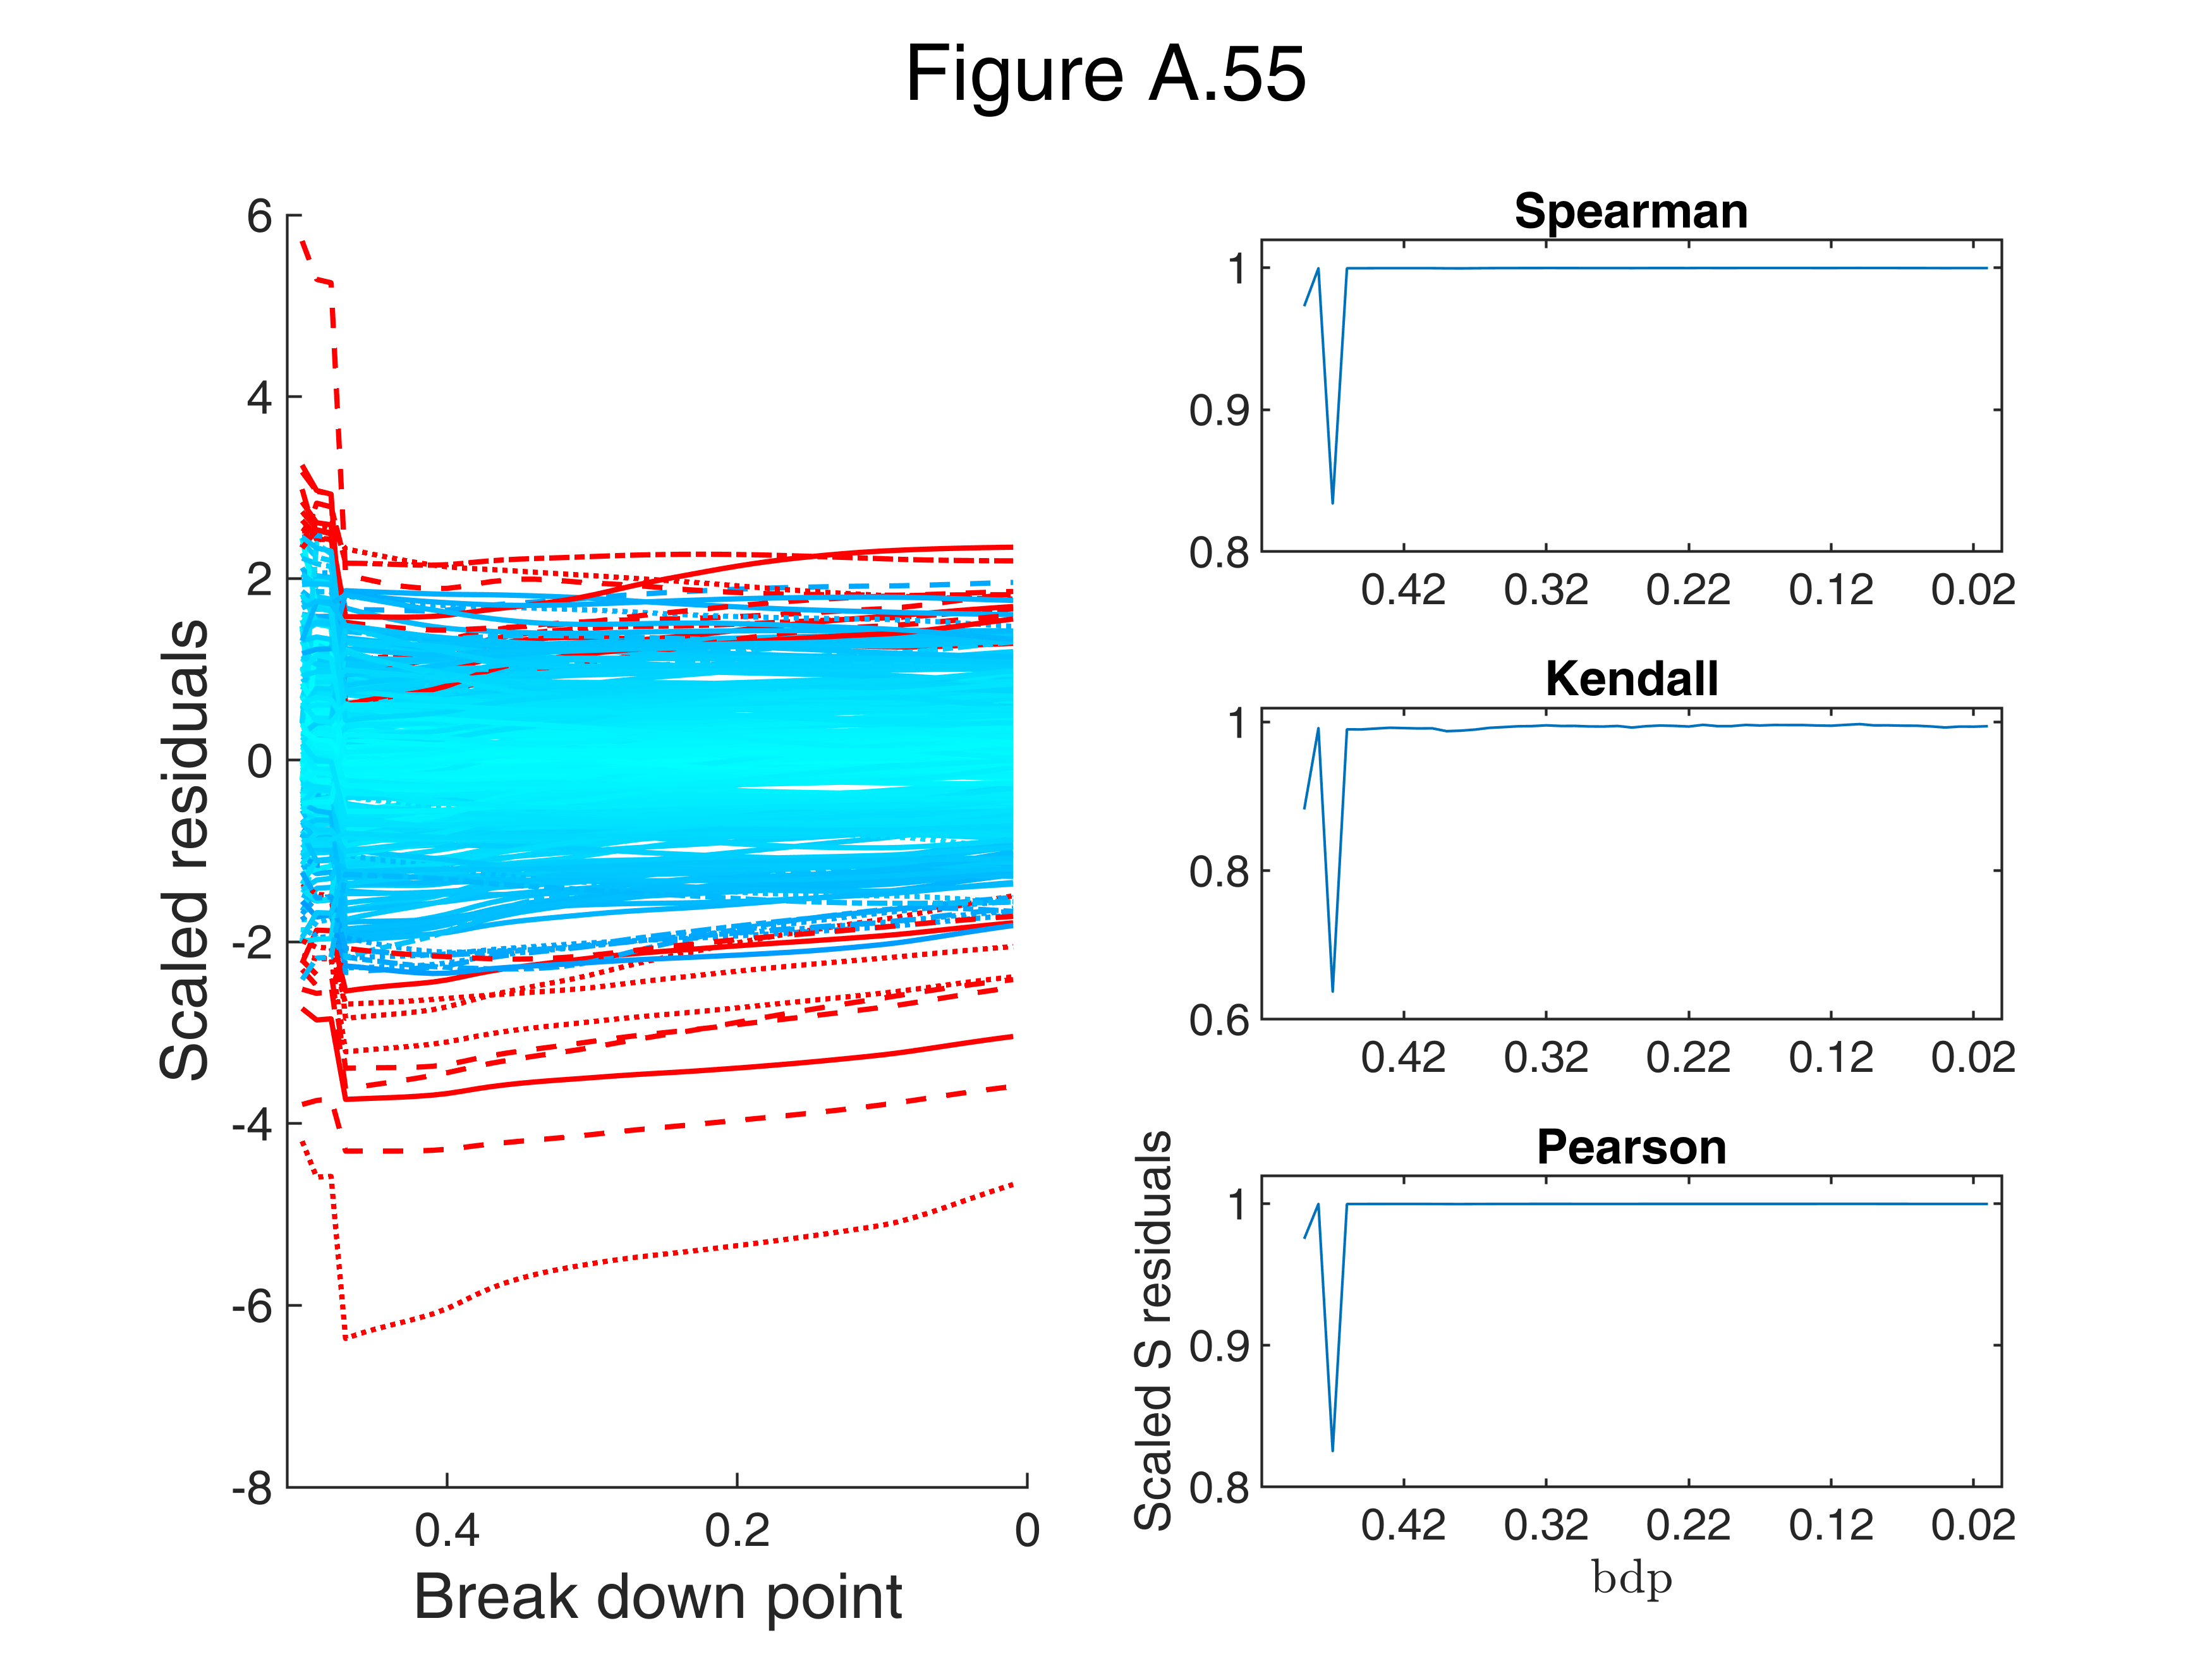

In [12]:
[out]=Sregeda(y,X,'msg',0);
fground = struct;
fground.Color={'r'};
fground.flabstep = '';
fground.fthresh=2.0;
resfwdplot(out, 'fground', fground, 'datatooltip','', 'corres', 1,'tag','pl_Sres');
ylabel('Scaled S residuals');
xlabel('bdp');

if prin==1
    % print to postscript
    print -depsc fatilr_S_mon.eps;
end

sgtitle('Figure A.55')
set(gcf,"Name",'Figure A.55')

In [13]:
drawnow

## Create Fig. A.56

Monitoring MM estimtes


In [14]:
[out]=MMregeda(y,X);

Total estimated time to complete S estimate:  0.05 seconds


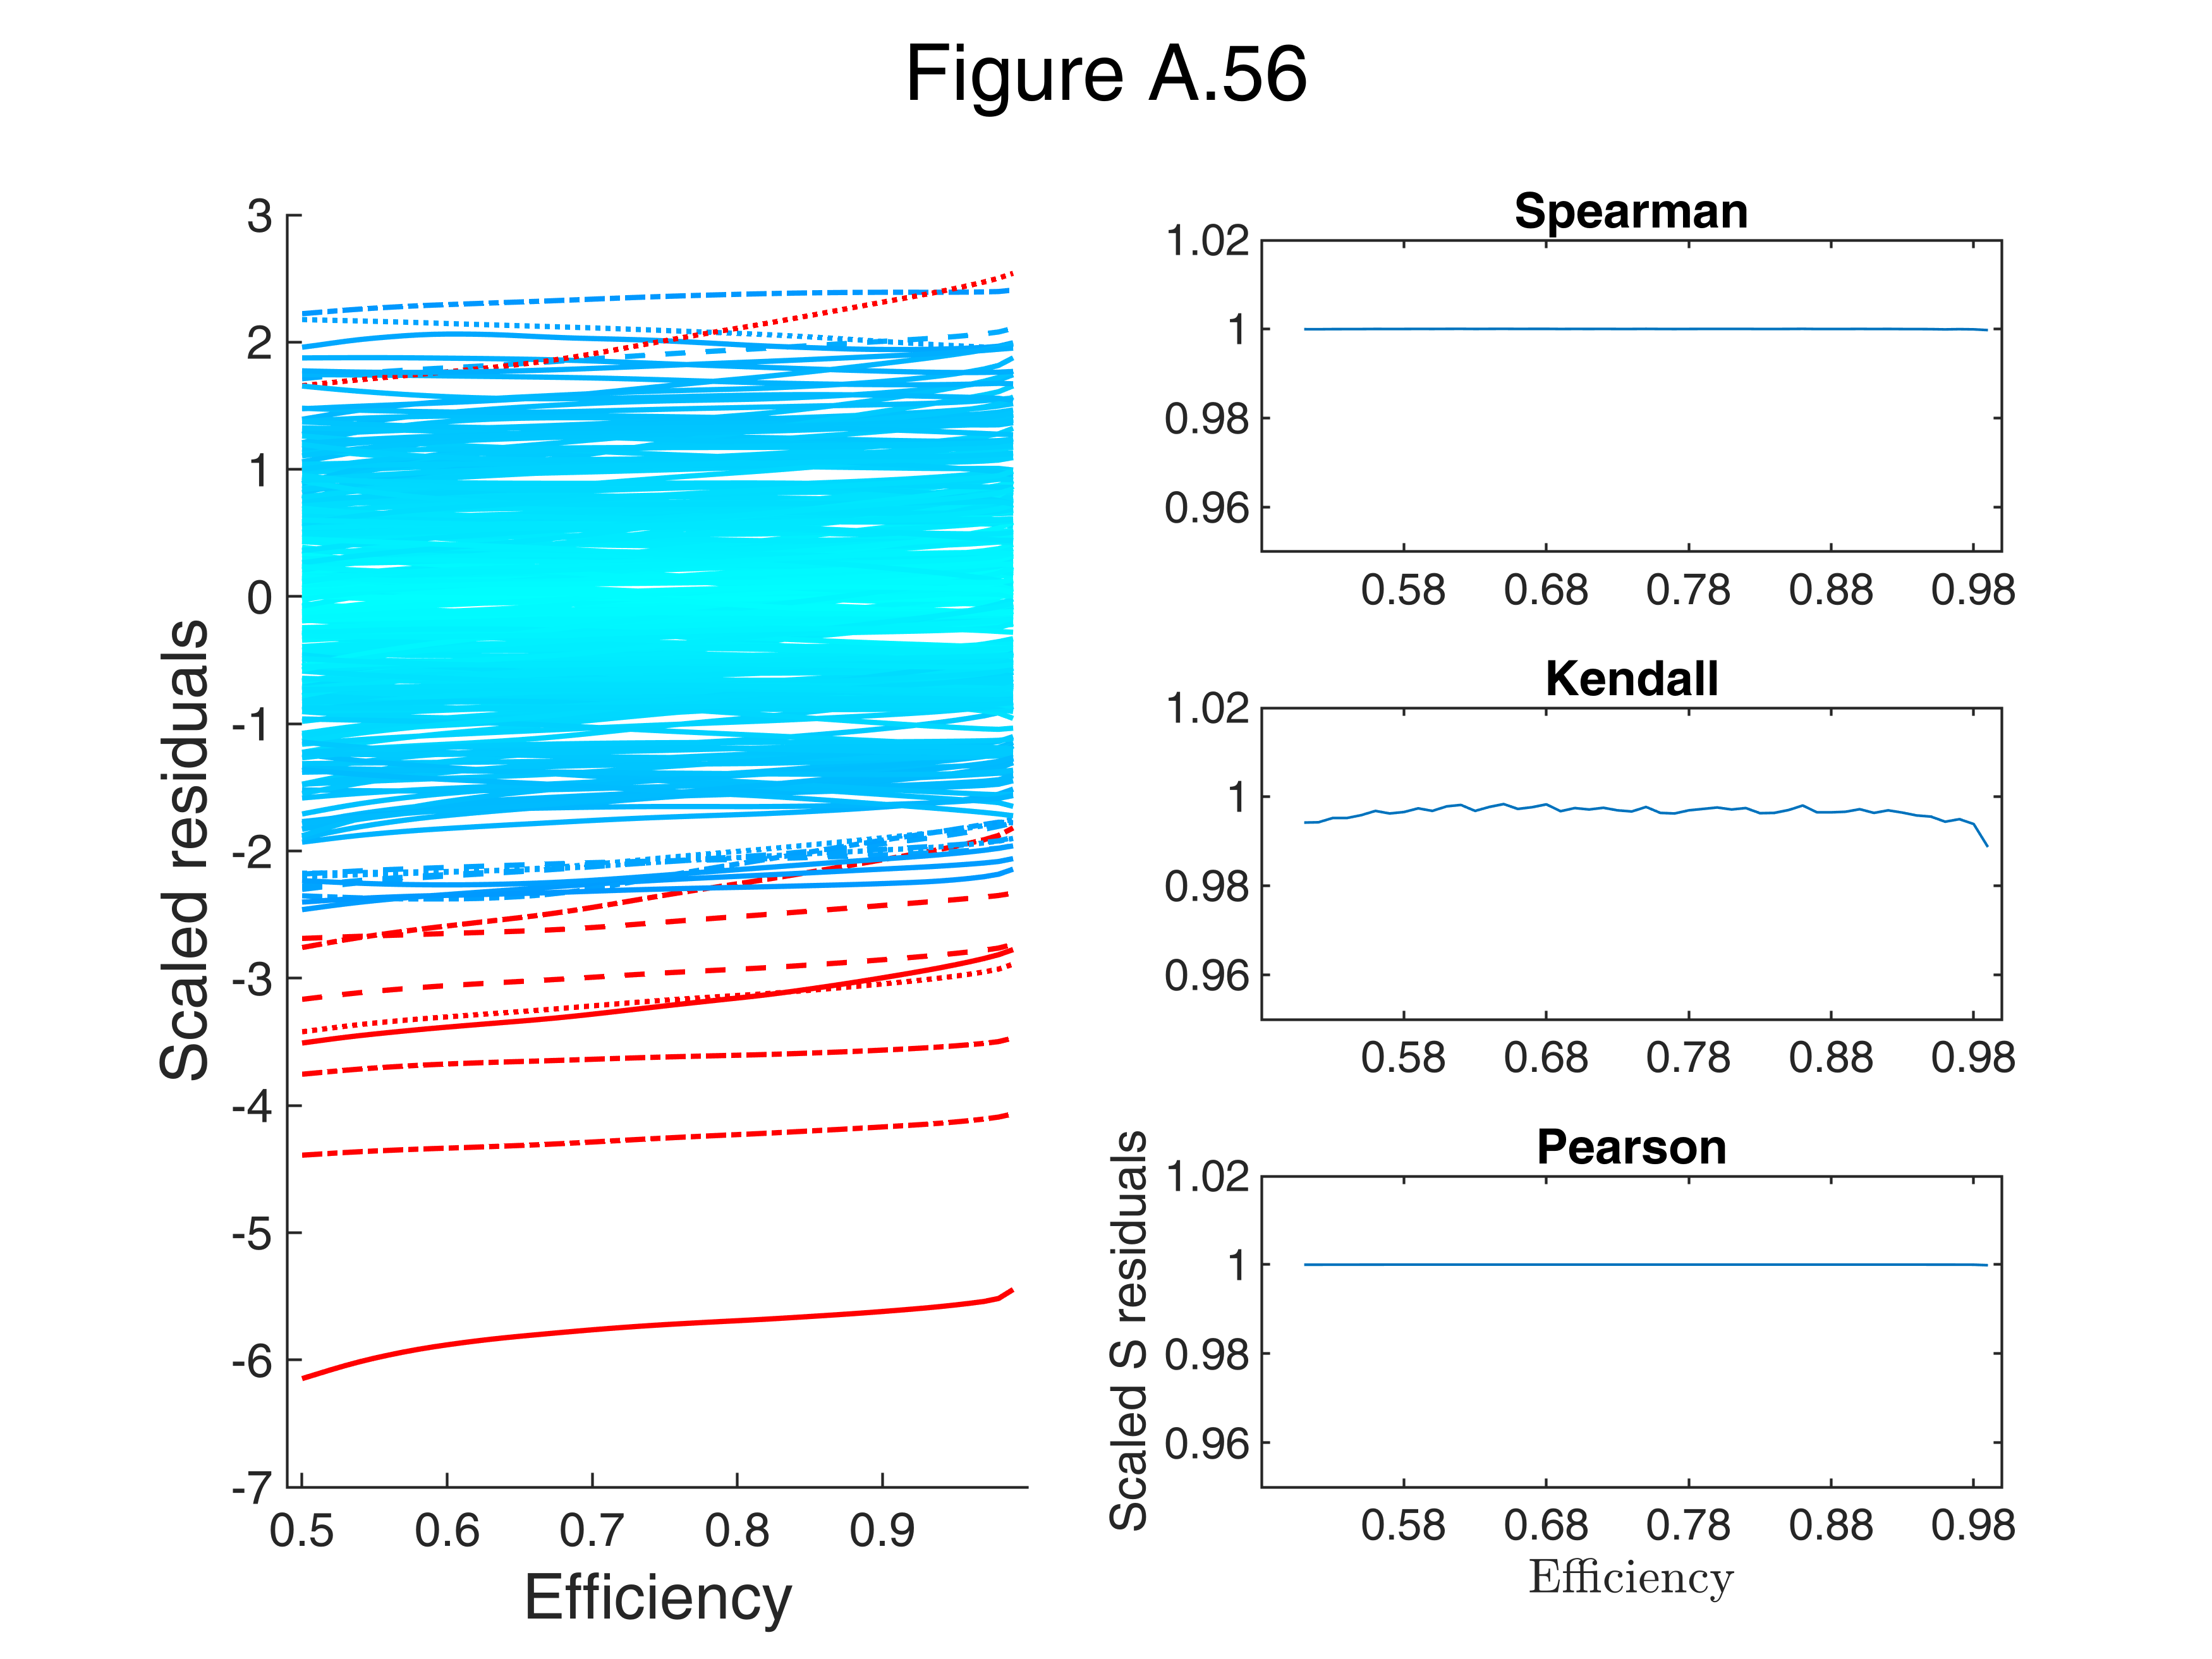

In [15]:
fground = struct;
fground.Color={'r'};
fground.flabstep = '';
fground.fthresh=2.0;
resfwdplot(out, 'fground', fground, 'datatooltip','', 'corres', 1);
ylabel('Scaled S residuals');
xlabel('Efficiency');

if prin==1
    % print to postscript
    print -depsc fatilr_MM_mon.eps;
end

sgtitle('Figure A.56')
set(gcf,"Name",'Figure A.56')

In [16]:

%InsideREADME